In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['honda','Honda','HONDA'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

# Then run this script below to create a Python dataframe of the tweets data

In [161]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import path
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)
pd.set_option("display.max_colwidth",150)

d = path.dirname('/home/pybokeh/temp/')
#text = open(path.join(d, 'twitter_data.txt')).read()

tweets_data = []
tweets_file = open(path.join(d, 'clinton.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if len(tweet) > 10:
            tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

455


In [162]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'] for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['sample']      = [tweet['text'][:20] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

In [163]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]

In [164]:
english_tweets = english_tweets.drop_duplicates(subset='text');

In [165]:
criteria1 = english_tweets['text'].str.contains("Hillary")
criteria2 = english_tweets['text'].str.contains("hillary")
criteria3 = english_tweets['text'].str.contains("hilary")

In [166]:
english_tweets = english_tweets[criteria1 | criteria2 | criteria3]

In [167]:
english_tweets

,text,lang,sample,retweeted
0,"RT @stevebeste: Let's talk about HP and Lucent. ""@CarlyFiorina: Hillary Clinton lacks a track record of accomplishment. http://t.co/5dzRUts…",en,RT @stevebeste: Let',False
5,Private emails reveal ex-Hillary Clinton aide’s secret spy network http://t.co/VCnaTSHpRM #chicago #illinois #wgn #cltv #pbs #npr,en,Private emails revea,False
6,"RT @HeyTammyBruce: Hillary Clinton wiped email server clean, refuses to turn it over http://t.co/GXRM4suHrN",en,RT @HeyTammyBruce: H,False
14,RT @gerfingerpoken: Huma Abedin: Hillary's Unindicted Email Co-Conspirator http://t.co/5o3dwVRvEJ … #IBDEditorials via @IBDinvestors http:/…,en,RT @gerfingerpoken:,False
16,"#tcot If Hillary Benghazi Clinton gets away with ignoring a federal subpoena, we should be able to ignore our federal income tax. #tcot",en,#tcot If Hillary Ben,False
23,RT @YoungBLKRepub: 3 New national Polls show that Majority of Americans don't trust Hillary Clinton RETWEET if you're in that Majority! htt…,en,RT @YoungBLKRepub: 3,False
25,"RT @thehill: RNC slams Hillary Clinton: ""Even Nixon didn't destroy the tapes"" http://t.co/CJFQxx5q3s http://t.co/EOjpPuPsXp",en,RT @thehill: RNC sla,False
30,Private emails reveal ex-Hillary Clinton aide’s secret spy network http://t.co/VCnaTSHpRM #p2 #uniteblue #inners #maddow #dnc #nyc,en,Private emails revea,False
35,Hillary Clinton Wants to Put Americans in Camps — to Solve ‘Fun Deficit ...: https://t.co/62GJuBt0MK,en,Hillary Clinton Want,False
49,RT @PhotoSkeen: @weknowwhatsbest\nHillary admitted using an I-phone &amp; Blackberry\nhttps://t.co/libqoHjo7G\n1 phone is a lie\nWhy isnt Pol &amp...,en,RT @PhotoSkeen: @wek,False


In [168]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line.replace("'s", " ")

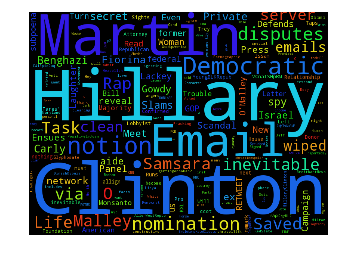

In [169]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

additional_words = [
    'rt',
    'ebay',
    't',
    'https',
    'co',
    't',
    'amp',
    's',
    'tcot',
    'de'
]

for word in additional_words:
    STOPWORDS.add(word)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
#honda_mask = imread(path.join(d, "honda_logo_mask.png"), flatten=True)
#wc = WordCloud(background_color="black", max_words=2000, mask=honda_mask, stopwords=STOPWORDS)

wc = WordCloud(width=800, height=600).generate(text)

# store to file
wc.to_file(path.join(d, "hillary.png"))

# show
plt.imshow(wc)
plt.axis("off")
#plt.figure()
#plt.imshow(honda_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

In [170]:
wc.process_text(text)[:50]

[('Hillary', 1.0),
 ('Clinton', 0.9785714285714285),
 ('Martin', 0.16428571428571428),
 ('Email', 0.15),
 ('Democratic', 0.14285714285714285),
 ('notion', 0.1357142857142857),
 ('disputes', 0.1357142857142857),
 ('nomination', 0.1357142857142857),
 ('Malley', 0.12857142857142856),
 ('O', 0.12857142857142856),
 ('inevitable', 0.11428571428571428),
 ('Life', 0.09285714285714286),
 ('Task', 0.09285714285714286),
 ('Rap', 0.09285714285714286),
 ('Saved', 0.09285714285714286),
 ('Samsara', 0.09285714285714286),
 ('via', 0.08571428571428572),
 ('server', 0.08571428571428572),
 ('wiped', 0.07857142857142857),
 ('emails', 0.07142857142857142),
 ('clean', 0.06428571428571428),
 ('Benghazi', 0.06428571428571428),
 ('Slams', 0.05714285714285714),
 ('secret', 0.05714285714285714),
 ('Carly', 0.05),
 ('Private', 0.05),
 ('spy', 0.05),
 ('Fiorina', 0.05),
 ('network', 0.05),
 ('ex', 0.04285714285714286),
 ('aide', 0.04285714285714286),
 ('Israel', 0.04285714285714286),
 ('Gowdy', 0.04285714285714286

In [171]:
STOPWORDS

{'',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'co',
 'com',
 'could',
 "couldn't",
 'de',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'ebay',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'http',
 'https',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 